<a href="https://colab.research.google.com/github/Alex-Chen1121/OpenCV/blob/main/Dlib_%E4%BA%BA%E8%87%89%E8%BE%A8%E8%AD%98(%E5%9C%96%E7%89%87%2C%E5%BD%B1%E7%89%87).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import cv2
import dlib
import os
from google.colab.patches import cv2_imshow
import numpy as np
from google.colab import drive
drive.mount("/content/drive")
os.chdir("/content/drive/MyDrive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


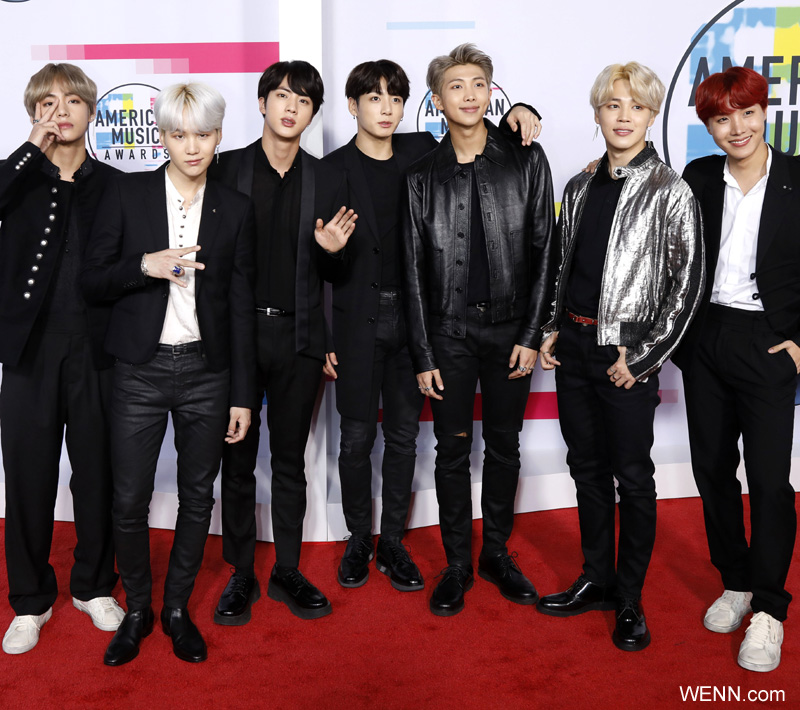

要識別的圖片


In [33]:
img = cv2.imread("bts.jpg")
cv2_imshow(img)
print("要識別的圖片")

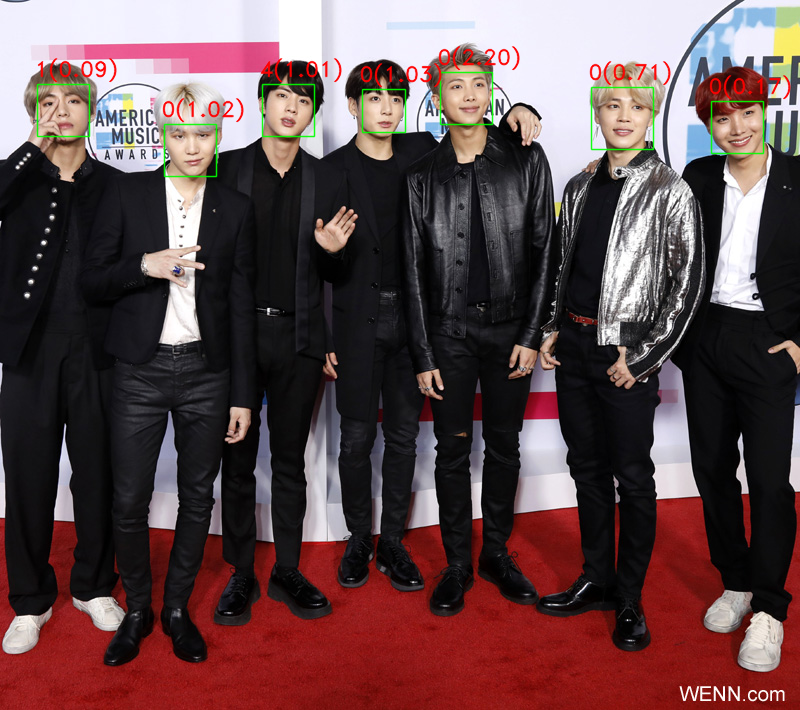

In [34]:
# 讀入圖片
img = cv2.imread("bts.jpg")

# 人臉偵測器
detector = dlib.get_frontal_face_detector()

# 偵測人臉
# face_rects:人臉框的座標
face_rects = detector(img, 1) # 0可以調整要偵測幾次

# 偵測人臉 並輸出分數
face_rects, scores, idx = detector.run(img, 1, -1)

for i, d in enumerate(face_rects):
  if scores[i]>0:
    x1 = d.left()
    y1 = d.top()
    x2 = d.right()
    y2 = d.bottom()
    cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 1, cv2.LINE_AA)
    text = "%d(%.2f)"%(idx[i],scores[i])
    cv2.putText(img, text, (x1-3,y1-8), cv2.FONT_HERSHEY_DUPLEX,
                0.7, (0,0,255),1,cv2.LINE_AA)
cv2_imshow(img)

In [35]:
face_rects

rectangles[[(440, 72) (492, 124)], [(362, 89) (405, 132)], [(164, 124) (216, 176)], [(262, 84) (314, 136)], [(591, 87) (653, 149)], [(711, 101) (763, 153)], [(37, 84) (89, 136)], [(165, 194) (201, 230)], [(181, 486) (217, 522)], [(305, 210) (341, 246)], [(746, 626) (789, 670)]]

In [36]:
import sys
video = "LALISA.mp4"
cap = cv2.VideoCapture(video)
if not cap.isOpened():
  print("影片損壞")
  sys.exit()

In [37]:
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(width, height)

fps = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(fps)

# 使用XVID編碼
fourcc = cv2.VideoWriter_fourcc(*"XVID")
# 輸出影片至OUTPUT.AVI, FPS值為20
out = cv2.VideoWriter("output.avi", fourcc, 20.0, (width, height))

1280 720
4946.0


In [ ]:
# 人臉偵測器
detector = dlib.get_frontal_face_detector()
# 偵測人臉 輸出分數
# face_rects = detector(img, 1) # 0可以調整要偵測幾次
cnt=0
while (cap.isOpened()):
  ret, frame = cap.read()
  if not ret:
    break
  else:
    face_rects, scores, idx = detector.run(frame, 1, -1)

    for i, d in enumerate(face_rects):
      if scores[i]>0:
        x1 = d.left()
        y1 = d.top()
        x2 = d.right()
        y2 = d.bottom()
        cv2.rectangle(frame, (x1,y1), (x2,y2), (0,255,0), 3,cv2.LINE_AA)
        text = "%d(%.2f)"%(idx[i],scores[i])
        cv2.putText(frame, text, (x1,y1), cv2.FONT_HERSHEY_DUPLEX, # 選擇字體
                    0.7, (0,0,255),1,cv2.LINE_AA) # 字體抗鋸齒
    cnt+=1
    if cnt%5==0:
      print("processing:{:.2f}".format(cnt/fps))
    out.write(frame)
cap.release()
out.release()
